### IPython solution to Conversion rate

### I. Data Analysis

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

%matplotlib inline

In [181]:
data = pd.read_csv('1_conversion_data.csv', header = 0)

In [155]:
data.head(5)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [157]:
data.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

No missing values!

In [158]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


Maximum age is 123 -- abnormal. Let's check the age.

In [159]:
sorted(data.age.unique(), reverse = True)

[123,
 111,
 79,
 77,
 73,
 72,
 70,
 69,
 68,
 67,
 66,
 65,
 64,
 63,
 62,
 61,
 60,
 59,
 58,
 57,
 56,
 55,
 54,
 53,
 52,
 51,
 50,
 49,
 48,
 47,
 46,
 45,
 44,
 43,
 42,
 41,
 40,
 39,
 38,
 37,
 36,
 35,
 34,
 33,
 32,
 31,
 30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17]

There are two highest age over 100. I suspect it to be unreal values. Let's check how many entries have 
these values and decide whether to delete it or not.

In [160]:
data.age[data.age > 100].count()

2

Only two entries have age over 100. They are probably entered incorrectly. Let's drop them.

In [161]:
data = data[data.age < 100]

In [162]:
data.source.value_counts()

Seo       155039
Ads        88739
Direct     72420
Name: source, dtype: int64

In [163]:
data['country_cat'] = data.country.map({'US': 1, 'China':2, 'UK':3, 'Germany':4})
data['source_cat'] = data.source.map({'Seo': 1, 'Ads': 2, 'Direct':3})

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 8 columns):
country                316198 non-null object
age                    316198 non-null int64
new_user               316198 non-null int64
source                 316198 non-null object
total_pages_visited    316198 non-null int64
converted              316198 non-null int64
country_cat            316198 non-null int64
source_cat             316198 non-null int64
dtypes: int64(6), object(2)
memory usage: 21.7+ MB


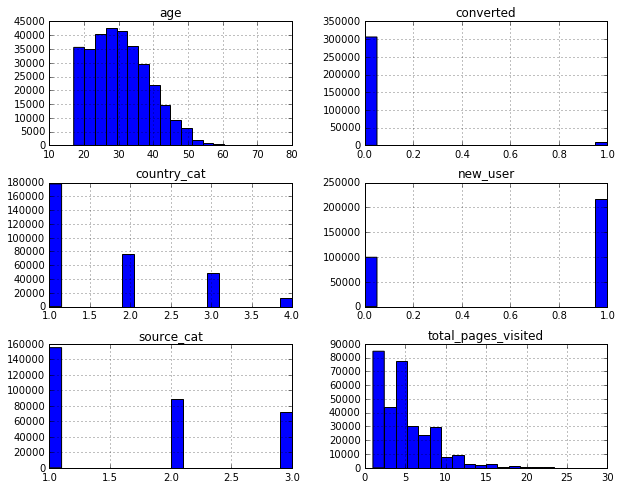

In [165]:
data.hist(figsize = (10, 8), bins =20)
plt.show()

Let's plot conversion rate by contry, age, source and total pages visited.

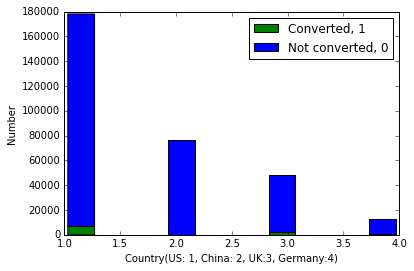

In [167]:
plt.hist([data[data.converted == 1]['country_cat'], data[data.converted == 0]['country_cat']], stacked = True,
         color = ['g','b'], label = ['Converted, 1', 'Not converted, 0'])
plt.legend()
plt.xlabel('Country(US: 1, China: 2, UK:3, Germany:4)')
plt.ylabel('Number')
plt.show()

0    0.962199
1    0.037801
Name: converted, dtype: float64 0    0.998668
1    0.001332
Name: converted, dtype: float64 0    0.947388
1    0.052612
Name: converted, dtype: float64 0    0.937572
1    0.062428
Name: converted, dtype: float64


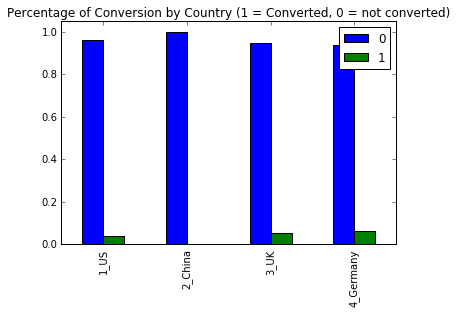

In [168]:
c1, c2, c3, c4 = data.groupby('country_cat').size()
Pc1 = data[data['country_cat'] == 1]['converted'].value_counts()/float(c1)
Pc2 = data[data['country_cat'] == 2]['converted'].value_counts()/float(c2)
Pc3 = data[data['country_cat'] == 3]['converted'].value_counts()/float(c3)
Pc4 = data[data['country_cat'] == 4]['converted'].value_counts()/float(c4)
df = pd.DataFrame([Pc1, Pc2, Pc3, Pc4])
df.index = ['1_US','2_China', '3_UK', '4_Germany']
df.plot(kind = 'bar', stacked = False, ylim = (0, 1.05), title = "Percentage of Conversion by Country (1 = Converted, 0 = not converted)")
print(Pc1, Pc2, Pc3, Pc4)

China has a much lower conversion rate compared to the other three countries. There may be something wrong with the Chinese version of this website or
Chinese user's access to this webpage.

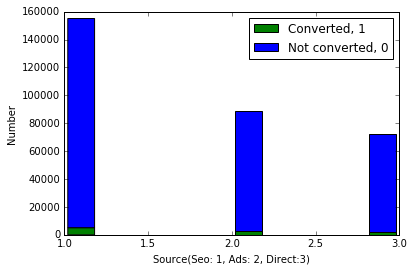

In [169]:
plt.hist([data[data.converted == 1]['source_cat'], data[data.converted == 0]['source_cat']], stacked = True,
         color = ['g','b'], label = ['Converted, 1', 'Not converted, 0'])
plt.legend()
plt.xlabel('Source(Seo: 1, Ads: 2, Direct:3)')
plt.ylabel('Number')
plt.show()

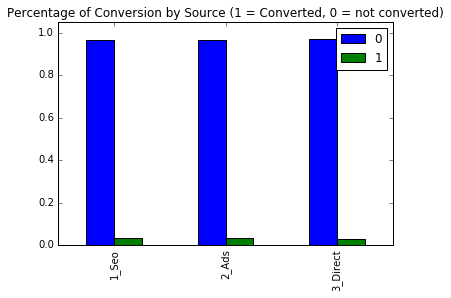

In [170]:
s1, s2, s3 = data.groupby('source_cat').size()
Ps1 = data[data.source_cat == 1]['converted'].value_counts()/s1
Ps2 = data[data.source_cat == 2]['converted'].value_counts()/s2
Ps3 = data[data.source_cat == 3]['converted'].value_counts()/s3
df = pd.DataFrame([Ps1, Ps2, Ps3])
df.index = ['1_Seo','2_Ads', '3_Direct']
df.plot(kind = 'bar', ylim = (0, 1.05), 
        title = "Percentage of Conversion by Source (1 = Converted, 0 = not converted)")

Similar conversion for different sources.

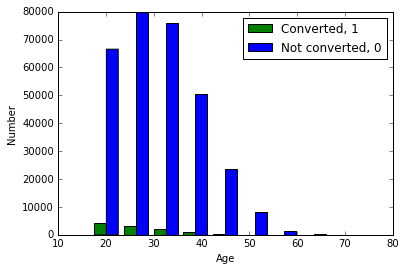

In [171]:
plt.hist([data[data.converted == 1]['age'], data[data.converted == 0]['age']], stacked = False,
         color = ['g','b'], label = ['Converted, 1', 'Not converted, 0'])
plt.legend()
plt.xlabel('Age')
plt.ylabel('Number')
plt.show()

Younger age has a higher conversion rate.

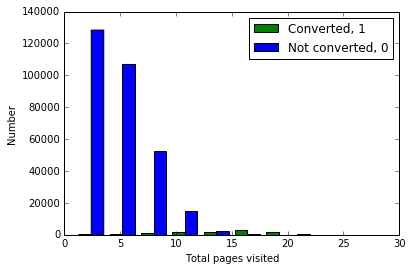

In [172]:
plt.hist([data[data.converted == 1]['total_pages_visited'], data[data.converted == 0]['total_pages_visited']], stacked = False,
         color = ['g','b'], label = ['Converted, 1', 'Not converted, 0'])
plt.legend()
plt.xlabel('Total pages visited')
plt.ylabel('Number')
plt.show()

### II.Machine Learning

In [174]:
data = data.drop(['country_cat', 'source_cat'], axis = 1)

In [182]:
def process_dummies(name):
    global data
    newname = pd.get_dummies(data[name], prefix=name)
    data = pd.concat([data,newname], axis=1)
    data.drop(name, axis=1, inplace=True)

In [183]:
process_dummies('country')
process_dummies('source')
process_dummies('new_user')

In [190]:
y = data['converted'].values
data = data.drop(['converted'], axis = 1)
x = data.values

In [197]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 2018)

Let's start with decision trees since it usually gives good prediction accuracy.

In [201]:
parameter = {'criterion':['entropy', 'gini'],'max_features':[1, 2, 3]} 

clf = DecisionTreeClassifier(random_state = 2018)
grid_search = GridSearchCV(estimator=clf, param_grid=parameter,scoring ='neg_log_loss', verbose=1, cv=10)
grid_search.fit(train_x, train_y)
for score in grid_search.grid_scores_:
    print('This is score: ', score)

output = grid_search.predict(test_x)
testaccuracy = accuracy_score(test_y, output)
print('This is test accuracy: ', testaccuracy)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
This is score:  mean: -0.25981, std: 0.02075, params: {'max_features': 1, 'criterion': 'entropy'}
This is score:  mean: -0.26438, std: 0.02048, params: {'max_features': 2, 'criterion': 'entropy'}
This is score:  mean: -0.26124, std: 0.01931, params: {'max_features': 3, 'criterion': 'entropy'}
This is score:  mean: -0.26509, std: 0.01918, params: {'max_features': 1, 'criterion': 'gini'}
This is score:  mean: -0.26406, std: 0.01791, params: {'max_features': 2, 'criterion': 'gini'}
This is score:  mean: -0.25980, std: 0.01982, params: {'max_features': 3, 'criterion': 'gini'}
This is test accuracy:  0.983607421463


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   19.3s finished
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


98.4% prediction accuracy! That's pretty good! Let's check the important features!

In [199]:
grid_search.best_estimator_.feature_importances_

array([  9.08903998e-02,   8.42674418e-01,   6.65044604e-04,
         1.53697379e-02,   7.93801073e-03,   1.74796706e-03,
         1.09695270e-03,   1.98920618e-03,   6.85133552e-04,
         2.62199820e-02,   1.07231476e-02])

In [200]:
data.head(5)

,age,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo,new_user_0,new_user_1
0,25,1,0,0,1,0,1,0,0,0,1
1,23,5,0,0,0,1,0,0,1,0,1
2,28,4,0,0,0,1,0,0,1,0,1
3,39,5,1,0,0,0,0,0,1,0,1
4,30,6,0,0,0,1,0,0,1,0,1


The top five important features are 1) country_China, 2) total_pages_visited 3) new_user_0 4) country_Germany 5) age.

This is consistent with our previous observation that 1) the site works very well for people from Germany and very bad for people from China;
2) this site works well for young people, but not as good for the elderly; 3）Users with old accounts(higher number of total_pages_visited) do better.


### Conclusions and Suggestions

1.	The site is working very well for young users. Definitely let’s tell marketing to advertise and use marketing channel which are more likely to reach young people.
2.	The site is working very well for Germany in terms of conversion. But the summary showed that there are few Germans coming to the site which is much less than UK despite a larger population. Thus there is big opportunity in getting more German users.
3.	Users with old accounts do much better. Targeted emails with offers to bring them back to the site could be a good idea to try.
4.	Something is wrong with the Chinese version of the site. It is either poorly translated, doesn’t fit the local culture, some payment issue or maybe it is just in English! Given how many users are based in China, fixing this should be a top priority.
5.	Maybe go through the UI and figure out why older users perform so poorly? From 30 y/o conversion clearly starts dropping.
6.	If I know someone has visited many pages, but hasn’t converted, she almost surely has high purchase intent. I could email her targeted offers or sending her reminders. Overall, these are probably the easiest users to make convert.